<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from pmdarima import auto_arima

In [4]:
df=pd.read_csv('/content/co2_mm_mlo.csv')

In [5]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [6]:
df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [7]:
df.set_index('date',inplace=True)

In [8]:
df.index.freq='MS'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Freq: MS
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          729 non-null    int64  
 1   month         729 non-null    int64  
 2   decimal_date  729 non-null    float64
 3   average       722 non-null    float64
 4   interpolated  729 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [10]:
df.isnull().sum()

year            0
month           0
decimal_date    0
average         7
interpolated    0
dtype: int64

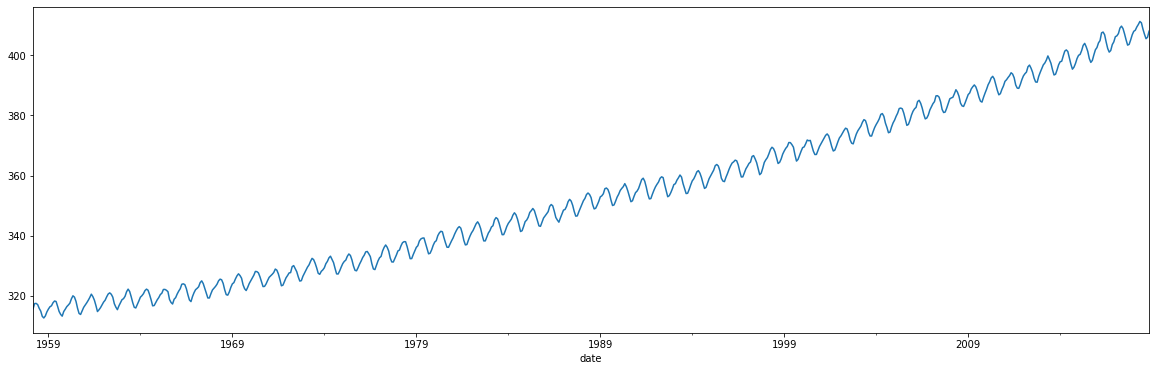

In [11]:
df['interpolated'].plot(figsize=(20,6))

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

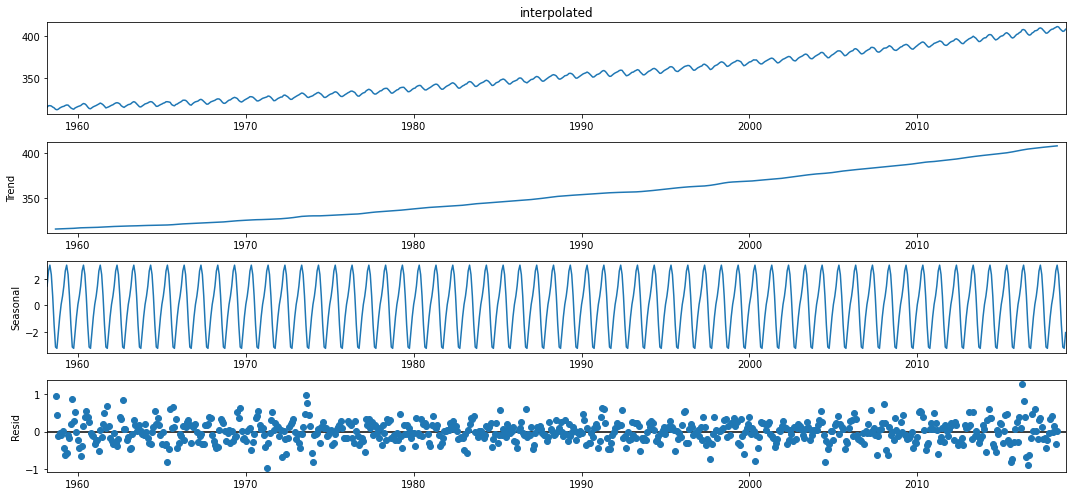

In [13]:
decomp=seasonal_decompose(df['interpolated'],model='add')
pylab.rcParams['figure.figsize']=15,7
decomp.plot();

In [14]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.693
Date:                              Thu, 21 Jan 2021   AIC                            423.387
Time:                                      05:53:39   BIC                            450.929
Sample:                                           0   HQIC                           434.014
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3549      0.034    -10.294      0.000      -0.422      -0.287
ma.L2         -0.0230      0.032     -0.712      0.476      -0.086       0.040
ma.L3         -0.0836      0.032     -2.607      0.009      -0.146      -0.021
ar.S.L12       0.9996      0.000   2988.504      0.000       0.999       1.000
ma.S.L12      -0.8666      0.021    -40.715      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.342      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
train_df=df.iloc[ :717]
test_df=df.iloc[717: ]

In [26]:
model=SARIMAX(train_df['interpolated'],order=(0, 1, 3),seasonal_order=(1, 0, [1], 12))

In [27]:
model_fit=model.fit()

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.190
Date:                              Thu, 21 Jan 2021   AIC                            414.380
Time:                                      06:41:23   BIC                            441.823
Sample:                                  03-01-1958   HQIC                           424.977
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3544      0.035    -10.114      0.000      -0.423      -0.286
ma.L2         -0.0246      0.027     -0.898      0.369      -0.078       0.029
ma.L3         -0.0862      0.033     -2.595      0.009      -0.151      -0.021
ar.S.L12       0.9996      0.000   2978.796      0.000       0.999       1.000
ma.S.L12      -0.8651      0.022    -38.820      0.000      -0.909      -0.821
sigma2         0.0951      0.005     20.299      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.78   Prob(JB):                         0.12
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start =len(train_df)
end=len(train_df)+len(test_df)-1

In [35]:
predictions=model_fit.predict(start,end)

In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
rmse(test_df['interpolated'],predictions)

0.35835582615900824

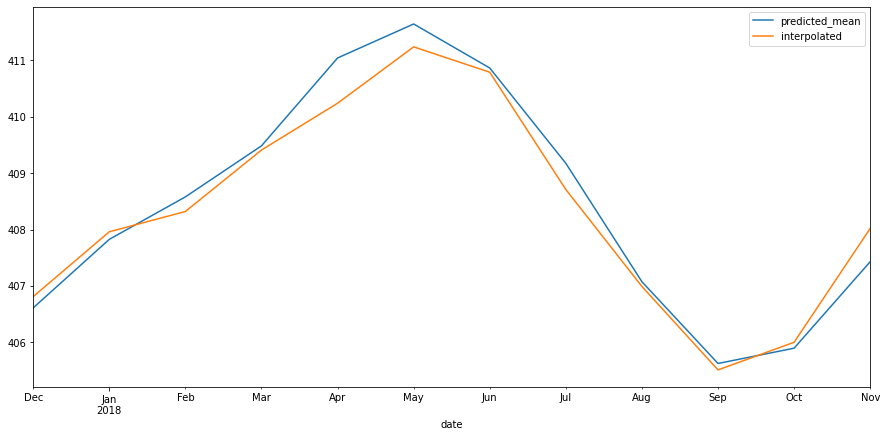

In [31]:
predictions.plot(legend=True)
test_df['interpolated'].plot(legend=True)

In [32]:
forecast=model.fit()


In [33]:
future_values=forecast.predict(start,end+12)

In [34]:
future_values

2017-12-01    406.610222
2018-01-01    407.825758
2018-02-01    408.579221
2018-03-01    409.484389
2018-04-01    411.042760
2018-05-01    411.646111
2018-06-01    410.865299
2018-07-01    409.174427
2018-08-01    407.074006
2018-09-01    405.623935
2018-10-01    405.895167
2018-11-01    407.429555
2018-12-01    408.863250
2019-01-01    410.066668
2019-02-01    410.812714
2019-03-01    411.717550
2019-04-01    413.275348
2019-05-01    413.878477
2019-06-01    413.097953
2019-07-01    411.407701
2019-08-01    409.308052
2019-09-01    407.858514
2019-10-01    408.129646
2019-11-01    409.663471
Freq: MS, Name: predicted_mean, dtype: float64